# Week4授業前課題1　アヤメを分類しよう

## 【課題1】練習のために特徴量とカテゴリを選択

In [1]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sns



data = load_iris()
X = DataFrame(data=data.data, columns=pd.Index(["sepal_length", "sepal_width", "petal_length", "petal_width"]))
y = DataFrame(data=data.target, columns=pd.Index(["Species"]))

df_train= X.join(y)

### ・virgicolorとvirginica

In [2]:
df_train.query("Species == [1, 2]")

,sepal_length,sepal_width,petal_length,petal_width,Species
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
55,5.7,2.8,4.5,1.3,1
56,6.3,3.3,4.7,1.6,1
57,4.9,2.4,3.3,1.0,1
58,6.6,2.9,4.6,1.3,1
59,5.2,2.7,3.9,1.4,1


### ・sepal_lengthとpetal_length

In [3]:
df_train[["sepal_length", "petal_length"]]

,sepal_length,petal_length
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4
5,5.4,1.7
6,4.6,1.4
7,5.0,1.5
8,4.4,1.4
9,4.9,1.5


### ・virgicolorとvirginica　sepal_lengthとpetal_lengthを抜き出す

In [4]:
# df_X = df_train.query("Species == ['versicolor', 'virginica']")[["sepal_length", "petal_length"]]
df_X = df_train.query("Species == [1, 2]")[["sepal_length", "petal_length"]]

In [5]:
df_X

,sepal_length,petal_length
50,7.0,4.7
51,6.4,4.5
52,6.9,4.9
53,5.5,4.0
54,6.5,4.6
55,5.7,4.5
56,6.3,4.7
57,4.9,3.3
58,6.6,4.6
59,5.2,3.9


## 【問題2】データの分析

/Users/clouds_kimura/anaconda3/envs/pythonml/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/clouds_kimura/anaconda3/envs/pythonml/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/clouds_kimura/anaconda3/envs/pythonml/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/clouds_kimura/anaconda3/envs/pythonml/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invali

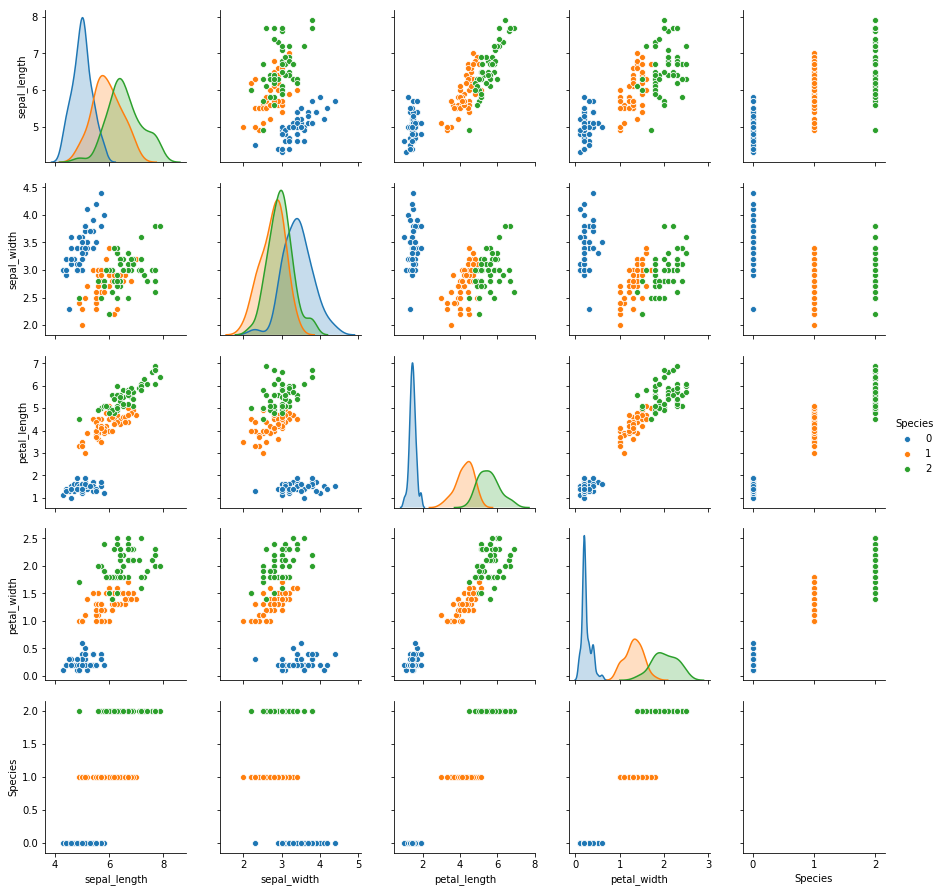

In [6]:
#散布図作成
sns.pairplot(df_train, hue='Species')

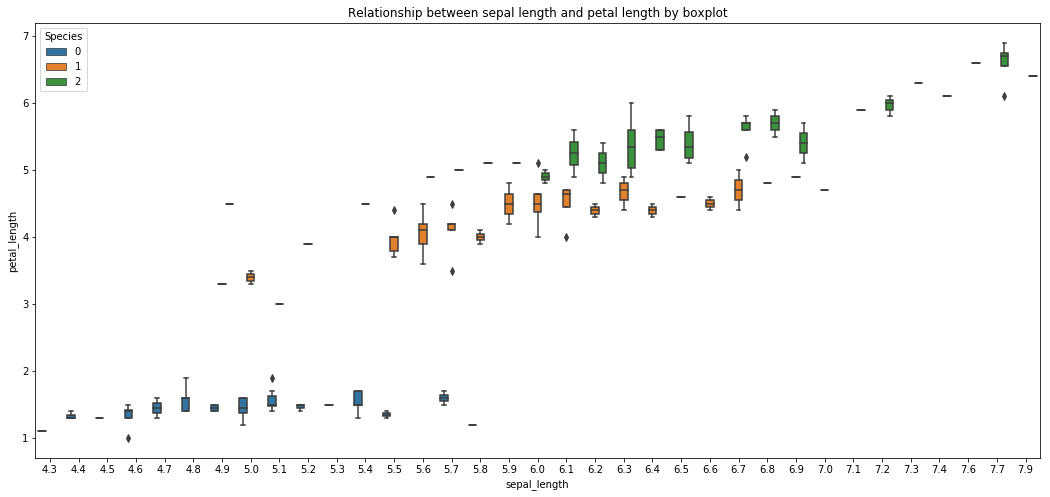

In [7]:
#boxplot作成
plt.figure(figsize=(18, 8))
plt.title('Relationship between sepal length and petal length by boxplot')
sns.boxplot(x=df_train['sepal_length'], y=df_train['petal_length'], hue=df_train['Species'])

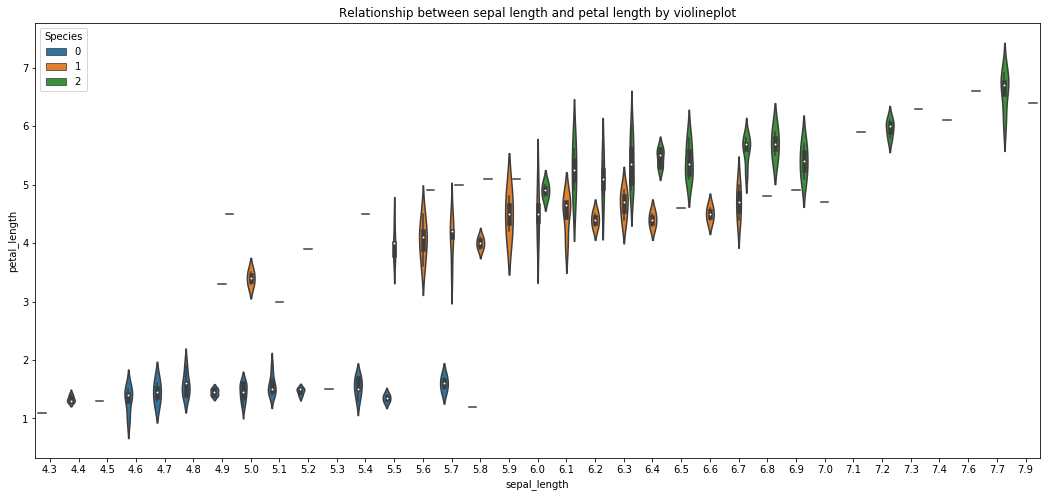

In [8]:
#violinplot作成
plt.figure(figsize=(18, 8))
plt.title('Relationship between sepal length and petal length by violineplot')
sns.violinplot(x=df_train['sepal_length'], y=df_train['petal_length'], hue=df_train['Species'],)

## 【問題2】前処理・学習用データと検証用データの分割

In [9]:
from sklearn.model_selection import train_test_split

#arrayに変換し、データを分割
(X_train, X_test, 
     y_train, y_test) = train_test_split(df_X.values, df_train.query("Species == [1, 2]").Species.values, test_size=0.25)

## 【問題3】前処理・標準化

In [99]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## 【問題4】学習と推定

In [100]:
#パラメータn_neighbors=5の場合で学習
neigh_5nn = KNeighborsClassifier(n_neighbors=5)
neigh_5nn.fit(X_train, y_train)

y_predict_neigh_5nn = neigh_5nn.predict(X_test)

In [101]:
#パラメータn_neighbors=3の場合で学習
neigh_3nn = KNeighborsClassifier(n_neighbors=3)
neigh_3nn.fit(X_train, y_train)
y_predict_neigh_3nn = neigh_3nn.predict(X_test)

In [102]:
#パラメータn_neighbors=1で学習
neigh_1nn = KNeighborsClassifier(n_neighbors=1)
neigh_1nn.fit(X_train, y_train)
y_predict_neigh_1nn = neigh_1nn.predict(X_test)

## 【問題5】評価

用語  
True Positive (TP): 正しいと予測して正しい  
False Positive (FP): 正しいと予測して正しくない  
True Negative (TN): 正しくないと予測して正しくない  
False Negative(FN): 正しくないと予測して正しい  

### ・accuracy（正解率）

予測に対しての正答率

$$
Accuracy=\frac{TP+TN}{TP+FP+TN+FN}
$$

In [103]:
accuracy_score(y_test, y_predict_neigh_5nn)

0.88

In [104]:
accuracy_score(y_test, y_predict_neigh_3nn)

0.92

In [105]:
accuracy_score(y_test, y_predict_neigh_1nn)

0.84

### ・precision（適合率）

正しいと予測したもののうち、結果が正しかったものの割合
$$
Precision=\frac{TP}{TP+FP}
$$

In [106]:
precision_score(y_test, y_predict_neigh_5nn, average='macro')

0.8831168831168831

In [107]:
precision_score(y_test, y_predict_neigh_3nn, average='macro')

0.9198717948717949

In [108]:
precision_score(y_test, y_predict_neigh_1nn, average='macro')

0.8500000000000001

### ・recall（再現率）
結果が正しかったもののうち、正しいと予測した割合
$$
Recall = \frac{TP}{TP+FN}
$$

In [109]:
recall_score(y_test, y_predict_neigh_5nn, average='micro') 

0.88

In [110]:
recall_score(y_test, y_predict_neigh_3nn, average='micro') 

0.92

In [111]:
recall_score(y_test, y_predict_neigh_1nn, average='micro') 

0.84

### ・f値
適合率と再現率のバランスを見る値。 
$$
\frac{1}{F-measure}=\frac{1}{2}\left( \frac{1}{Recall}+\frac{1}{Precision} \right)
$$

In [112]:
f1_score(y_test, y_predict_neigh_5nn, average='macro') 

0.8792270531400966

In [113]:
f1_score(y_test, y_predict_neigh_3nn, average='macro')

0.9198717948717949

In [114]:
f1_score(y_test, y_predict_neigh_1nn, average='macro')

0.8376623376623377

In [115]:
estimation_neigh_dict = {
    "accuracy": accuracy_score(y_test, y_predict_neigh_3nn),
    "precision": precision_score(y_test, y_predict_neigh_3nn, average='macro'),
    "recall": recall_score(y_test, y_predict_neigh_3nn, average='micro') ,
    "f1":f1_score(y_test, y_predict_neigh_3nn, average='macro')
}
estimation_neigh = pd.DataFrame(estimation_neigh_dict, index=['KNeighborsClassifier'])

In [116]:
estimation_neigh

,accuracy,precision,recall,f1
KNeighborsClassifier,0.92,0.919872,0.92,0.919872


### ・混合行列

In [117]:
confusion_matrix(y_test, y_predict_neigh_5nn)

array([[10,  2],
       [ 1, 12]])

In [118]:
confusion_matrix(y_test, y_predict_neigh_3nn)

array([[11,  1],
       [ 1, 12]])

In [119]:
confusion_matrix(y_test, y_predict_neigh_1nn)

array([[ 9,  3],
       [ 1, 12]])

## 【問題6】可視化

In [120]:
def decision_region(X_train, y_train, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は学習用データである。

    Parameters
    ----------------
    X_train : ndarray, shape(n_samples, 2)
        学習用データの特徴量
    y_train : ndarray, shape(n_samples,)
        学習用データの正解値
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X_train[:,0])-0.5, np.max(X_train[:,0])+0.5, step), np.arange(np.min(X_train[:,1])-0.5, np.max(X_train[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y_train)):
        plt.scatter(X_train[y_train==target][:, 0], X_train[y_train==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

In [121]:
y_train

array([2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1,
       1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1,
       1, 2, 2, 2, 1, 2, 1, 2, 2])

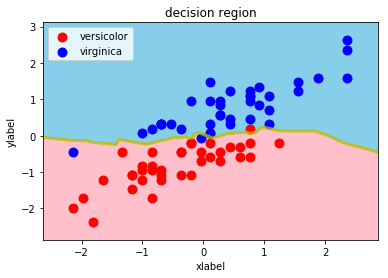

In [122]:
decision_region(X_train, y_train, neigh_5nn)

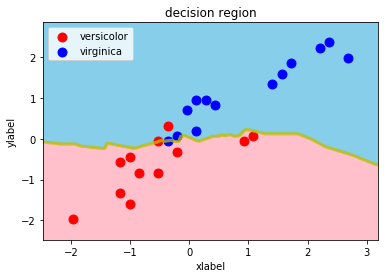

In [123]:
decision_region(X_test, y_test, neigh_5nn)

## 【問題7】他の手法の学習

### ・ロジスティック回帰

In [124]:
from sklearn.linear_model import LogisticRegression

clf_logistic = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X_train, y_train)
y_predict_logistic = clf_logistic.predict(X_test)

#### 評価

In [125]:
estimation_logistic_dict = {
    "accuracy": accuracy_score(y_test, y_predict_logistic),
    "precision": precision_score(y_test, y_predict_logistic),
    "recall": recall_score(y_test, y_predict_logistic),
    "f1":f1_score(y_test, y_predict_logistic)
}

estimation_logistic = pd.DataFrame(estimation_logistic_dict, index=['LogisticRegression'])

In [126]:
estimation_logistic

,accuracy,precision,recall,f1
LogisticRegression,0.92,1.0,0.833333,0.909091


In [127]:
#混合行列
confusion_matrix(y_test, y_predict_logistic)

array([[10,  2],
       [ 0, 13]])

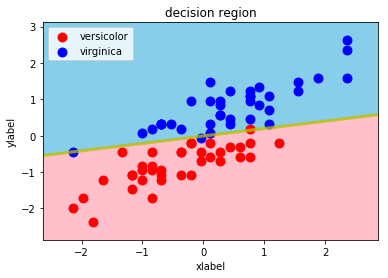

In [128]:
#決定領域を描画
decision_region(X_train, y_train, clf_logistic)

### ・SVM

In [129]:
from sklearn.svm import SVC

clf_svc = SVC(gamma='auto').fit(X_train, y_train)
y_predict_svc = clf_svc.predict(X_test)

#### 評価

In [130]:
estimation_svc_dict = {
    "accuracy": accuracy_score(y_test, y_predict_svc),
    "precision": precision_score(y_test, y_predict_svc),
    "recall": recall_score(y_test, y_predict_svc),
    "f1":f1_score(y_test, y_predict_svc)
}

estimation_svc = pd.DataFrame(estimation_svc_dict, index=['Support Vector Classification'])

In [131]:
estimation_svc

,accuracy,precision,recall,f1
Support Vector Classification,0.88,0.909091,0.833333,0.869565


In [132]:
#混合行列
confusion_matrix(y_test, y_predict_svc)

array([[10,  2],
       [ 1, 12]])

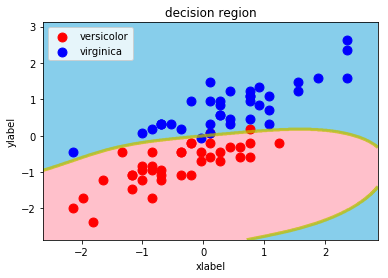

In [133]:
#決定領域を描画
decision_region(X_train, y_train, clf_svc)

### ・決定木

In [134]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

clf_dtc = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
y_predict_dtc = clf_dtc.predict(X_test)

estimation_dtc_dict = {
    "accuracy": accuracy_score(y_test, y_predict_dtc),
    "precision": precision_score(y_test, y_predict_dtc),
    "recall": recall_score(y_test, y_predict_dtc),
    "f1":f1_score(y_test, y_predict_dtc)
}
estimation_dtc = pd.DataFrame(estimation_dtc_dict, index=['DecisionTreeClassifier'])

#### 評価

In [135]:
estimation_dtc

,accuracy,precision,recall,f1
DecisionTreeClassifier,0.88,0.909091,0.833333,0.869565


In [136]:
#混合行列
confusion_matrix(y_test, y_predict_dtc)

array([[10,  2],
       [ 1, 12]])

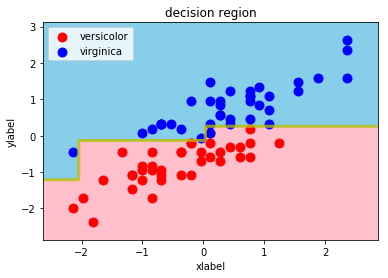

In [137]:
#決定領域を描画
decision_region(X_train, y_train, clf_dtc)

### ・ランダムフォレスト

In [138]:
from sklearn.ensemble import RandomForestClassifier

clf_rfc = RandomForestClassifier().fit(X_train, y_train)
y_predict_rfc = clf_rfc.predict(X_test)

estimation_rfc_dict = {
    "accuracy": accuracy_score(y_test, y_predict_rfc),
    "precision": precision_score(y_test, y_predict_rfc),
    "recall": recall_score(y_test, y_predict_rfc),
    "f1":f1_score(y_test, y_predict_rfc)
}
estimation_rfc = pd.DataFrame(estimation_rfc_dict, index=['RandomForestClassifier'])

/Users/clouds_kimura/anaconda3/envs/pythonml/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


#### 評価

In [139]:
estimation_rfc

,accuracy,precision,recall,f1
RandomForestClassifier,0.88,0.909091,0.833333,0.869565


In [140]:
#混合行列
confusion_matrix(y_test, y_predict_rfc)

array([[10,  2],
       [ 1, 12]])

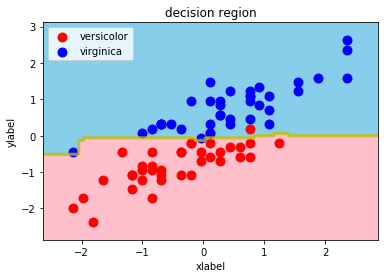

In [141]:
#決定領域を描画
decision_region(X_train, y_train, clf_rfc)

---
### 考察

In [142]:
#指標を１つにまとめる
pd.concat([estimation_neigh, estimation_logistic, estimation_svc, estimation_dtc, estimation_rfc], axis=0)

,accuracy,precision,recall,f1
KNeighborsClassifier,0.92,0.919872,0.920000,0.919872
LogisticRegression,0.92,1.000000,0.833333,0.909091
Support Vector Classification,0.88,0.909091,0.833333,0.869565
DecisionTreeClassifier,0.88,0.909091,0.833333,0.869565
RandomForestClassifier,0.88,0.909091,0.833333,0.869565


表からすると最近傍法、ロジスティック回帰、SVMあたりは高い値がでた。  
ただ、実行するたびに値が変わるので一概には言えない。複数回実行して平均を取ったほうがいいと考える。  
決定領域をみると、決定木、ランダムフォレストが判別出来ているように見える。